In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import json

In [2]:
df=pd.read_csv(r'C:\Machine Learning\projects\used car\used_cars_data.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
pd.options.display.float_format = '{:.2f}'.format

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [6]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [7]:
df.shape

(7253, 14)

In [8]:
df['Company_name']=df['Name'].str.split().str.get(0)

In [9]:
df['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [10]:
df[df['Fuel_Type']=='Electric']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_name
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00,13.58 Lakh,13.00,Mahindra
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.00,NaN,12.75,Toyota


In [11]:
columns = ['Mileage']
df=df.dropna(subset=[col for col in df.columns if col in columns])

In [12]:
df['Fuel_Type'].value_counts()

Diesel    3852
Petrol    3325
CNG         62
LPG         12
Name: Fuel_Type, dtype: int64

In [13]:
df['Mil_unit']=df['Mileage'].str.split().str.get(1)
df['Mileage']=df['Mileage'].str.split().str.get(0)

In [14]:
df['Mil_unit'].value_counts()

kmpl     7177
km/kg      74
Name: Mil_unit, dtype: int64

In [15]:
df['Mileage']=df['Mileage'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7251 non-null   int64  
 1   Name               7251 non-null   object 
 2   Location           7251 non-null   object 
 3   Year               7251 non-null   int64  
 4   Kilometers_Driven  7251 non-null   int64  
 5   Fuel_Type          7251 non-null   object 
 6   Transmission       7251 non-null   object 
 7   Owner_Type         7251 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7205 non-null   object 
 10  Power              7205 non-null   object 
 11  Seats              7198 non-null   float64
 12  New_Price          1005 non-null   object 
 13  Price              6017 non-null   float64
 14  Company_name       7251 non-null   object 
 15  Mil_unit           7251 non-null   object 
dtypes: float64(3), int64(3),

In [17]:
def change_unit(fuel,unit,value):
    if unit=='km/kg' :
        if fuel=='CNG' or fuel=='Diesel':
            return value/0.8
        elif fuel=='Petrol':
            return value/0.74
        else:
            return value/0.54
    else:
        return value

In [18]:
df['Mil_in_kmpl']=df.apply(lambda row:change_unit(row['Fuel_Type'],row['Mil_unit'],row['Mileage']),axis=1)

In [19]:
df.head(15)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_name,Mil_unit,Mil_in_kmpl
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.00,NaN,1.75,Maruti,km/kg,33.25
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.00,NaN,12.50,Hyundai,kmpl,19.67
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.00,8.61 Lakh,4.50,Honda,kmpl,18.20
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.00,NaN,6.00,Maruti,kmpl,20.77
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.00,NaN,17.74,Audi,kmpl,15.20
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814 CC,55.2 bhp,5.00,NaN,2.35,Hyundai,km/kg,39.07
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461 CC,63.1 bhp,5.00,NaN,3.50,Nissan,kmpl,23.08
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755 CC,171.5 bhp,8.00,21 Lakh,17.50,Toyota,kmpl,11.36
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598 CC,103.6 bhp,5.00,NaN,5.20,Volkswagen,kmpl,20.54
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248 CC,74 bhp,5.00,NaN,1.95,Tata,kmpl,22.30


In [20]:
df['Engine'].nunique()

149

In [21]:
df['Eng_unit']=df['Engine'].str.split().str.get(1)
df['Engine']=df['Engine'].str.split().str.get(0)

In [22]:
df['Eng_unit'].value_counts()

CC    7205
Name: Eng_unit, dtype: int64

In [23]:
df['Engine']=df['Engine'].astype(float)

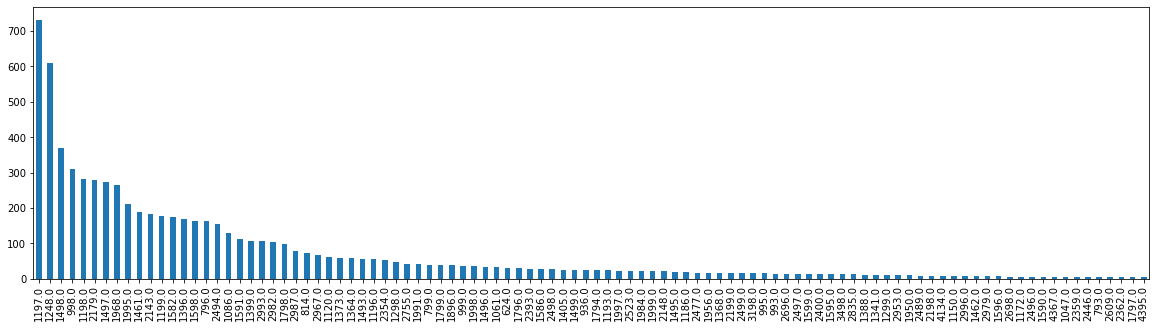

In [24]:
plt.figure(figsize=(20,5))
df['Engine'].value_counts().head(100).plot.bar()
plt.show()

In [25]:
df['Engine']=df['Engine'].fillna(df['Engine'].median())

In [26]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company_name,Mil_unit,Mil_in_kmpl,Eng_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.00,58.16 bhp,5.00,NaN,1.75,Maruti,km/kg,33.25,CC
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.00,126.2 bhp,5.00,NaN,12.50,Hyundai,kmpl,19.67,CC
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.00,88.7 bhp,5.00,8.61 Lakh,4.50,Honda,kmpl,18.20,CC
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.00,88.76 bhp,7.00,NaN,6.00,Maruti,kmpl,20.77,CC
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.00,140.8 bhp,5.00,NaN,17.74,Audi,kmpl,15.20,CC


In [27]:
df['Pow_unit']=df['Power'].str.split().str.get(1)
df['Power']=df['Power'].str.split().str.get(0)

In [28]:
df['Pow_unit'].value_counts()

bhp    7205
Name: Pow_unit, dtype: int64

In [29]:
df['Power']=df['Power'].replace("null",np.nan)

In [30]:
df['Power']=df['Power'].astype(float)

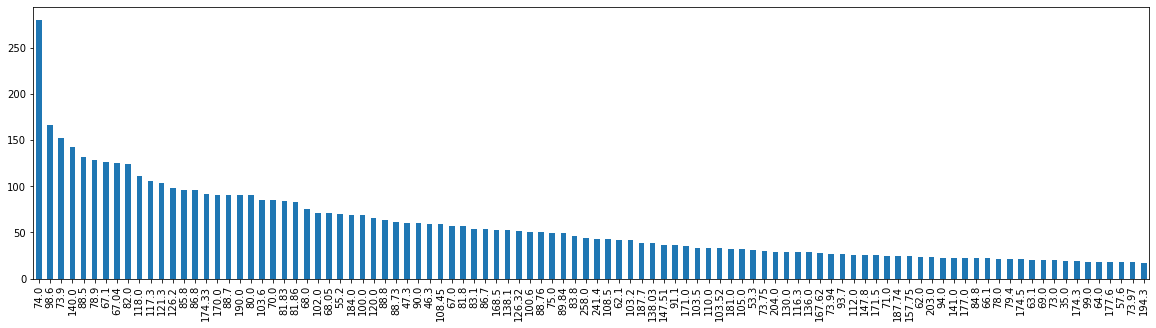

In [31]:
plt.figure(figsize=(20,5))
df['Power'].value_counts().head(100).plot.bar()
plt.show()

In [32]:
grp_cmp=df.groupby(['Company_name'])['Power'].mean().round(2)
grp_cmp_dic=grp_cmp.to_dict()
grp_cmp_dic

{'Ambassador': 35.5,
 'Audi': 189.34,
 'BMW': 210.73,
 'Bentley': 584.0,
 'Chevrolet': 90.91,
 'Datsun': 60.64,
 'Fiat': 89.03,
 'Force': 139.03,
 'Ford': 96.36,
 'Hindustan': nan,
 'Honda': 108.45,
 'Hyundai': 92.15,
 'ISUZU': 134.0,
 'Isuzu': 167.78,
 'Jaguar': 236.22,
 'Jeep': 168.95,
 'Lamborghini': 560.0,
 'Land': 188.75,
 'Mahindra': 119.71,
 'Maruti': 74.0,
 'Mercedes-Benz': 193.62,
 'Mini': 146.66,
 'Mitsubishi': 145.19,
 'Nissan': 89.7,
 'OpelCorsa': 88.0,
 'Porsche': 325.92,
 'Renault': 87.51,
 'Skoda': 126.62,
 'Smart': nan,
 'Tata': 78.28,
 'Toyota': 128.33,
 'Volkswagen': 94.76,
 'Volvo': 188.46}

In [33]:
with open('grp_cmp_dic.json','w') as file:
    json.dump(grp_cmp_dic,file)

In [34]:
def pow_null(value,name):
    if np.isnan(value)==True:
        return grp_cmp_dic[name]
    else:
        return value

In [35]:
df['Power']=df.apply(lambda row: pow_null(row['Power'],row['Company_name']),axis=1)

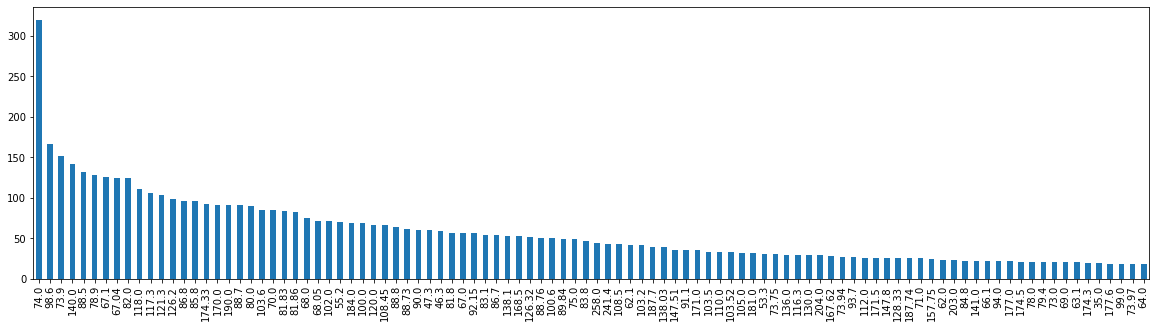

In [36]:
plt.figure(figsize=(20,5))
df['Power'].value_counts().head(100).plot.bar()
plt.show()

In [37]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   2
Seats                  53
New_Price            6246
Price                1234
Company_name            0
Mil_unit                0
Mil_in_kmpl             0
Eng_unit               46
Pow_unit               46
dtype: int64

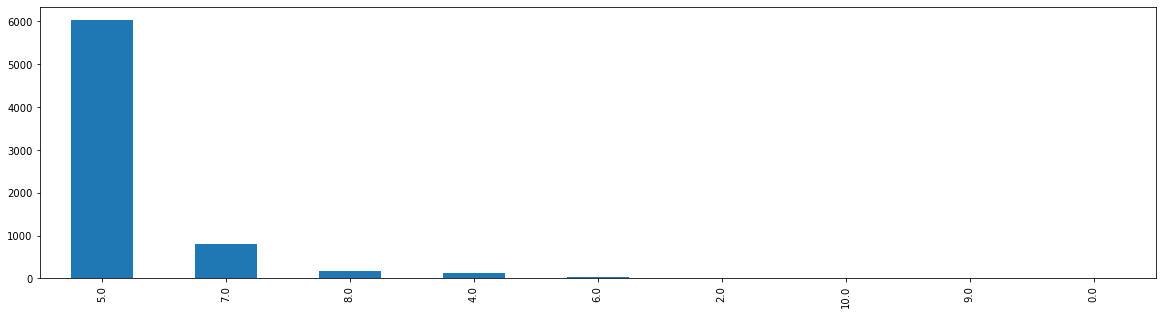

In [38]:
plt.figure(figsize=(20,5))
df['Seats'].value_counts().plot.bar()
plt.show()

In [39]:
df['Seats']=df['Seats'].astype(float)

In [40]:
df['Seats']=df['Seats'].fillna(5.0)

In [41]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   2
Seats                   0
New_Price            6246
Price                1234
Company_name            0
Mil_unit                0
Mil_in_kmpl             0
Eng_unit               46
Pow_unit               46
dtype: int64

In [42]:
df2=pd.read_csv(r'C:\Machine Learning\projects\used car\CARS_1.csv')
df2.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.00,Automatic,27.00,Hatchback,4.50,399000,583000,89.00,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.00,Automatic,48.00,SUV,4.50,799000,1396000,136.80,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.00,Automatic,57.00,SUV,4.50,1353000,1603000,300.00,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.00,Automatic,60.00,SUV,4.50,1318000,2458000,450.00,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.00,Automatic,57.00,SUV,4.50,1199000,2390000,400.00,2750,172.45,3500


In [43]:
df2=df2[['car_name','starting_price','ending_price']]
df2.head()

,car_name,starting_price,ending_price
0,Maruti Alto K10,399000,583000
1,Maruti Brezza,799000,1396000
2,Mahindra Thar,1353000,1603000
3,Mahindra XUV700,1318000,2458000
4,Mahindra Scorpio-N,1199000,2390000


In [44]:
df2['f_name']=df2['car_name'].str.split().str.get(0)
df2['l_name']=df2['car_name'].str.split().str.get(1)
df2['full_name']=df2[['f_name','l_name']].apply(lambda x: ' '.join(x),axis=1)

In [45]:
df['name']=df['Name'].str.split().str.get(1)
df['full_name']=df[['Company_name','name']].apply(lambda x: ' '.join(x),axis=1)

In [46]:
df2['price']=((df2['starting_price']+df2['ending_price'])/200000)

In [47]:
new_price=df2[['full_name','price']]
new_price.head()

,full_name,price
0,Maruti Alto,4.91
1,Maruti Brezza,10.97
2,Mahindra Thar,14.78
3,Mahindra XUV700,18.88
4,Mahindra Scorpio-N,17.95


In [48]:
df3=pd.merge(df,new_price,on='full_name',how='left')

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9295 entries, 0 to 9294
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              9295 non-null   int64  
 1   Name               9295 non-null   object 
 2   Location           9295 non-null   object 
 3   Year               9295 non-null   int64  
 4   Kilometers_Driven  9295 non-null   int64  
 5   Fuel_Type          9295 non-null   object 
 6   Transmission       9295 non-null   object 
 7   Owner_Type         9295 non-null   object 
 8   Mileage            9295 non-null   float64
 9   Engine             9295 non-null   float64
 10  Power              9293 non-null   float64
 11  Seats              9295 non-null   float64
 12  New_Price          1329 non-null   object 
 13  Price              7732 non-null   float64
 14  Company_name       9295 non-null   object 
 15  Mil_unit           9295 non-null   object 
 16  Mil_in_kmpl        9295 

In [50]:
df3.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   2
Seats                   0
New_Price            7966
Price                1563
Company_name            0
Mil_unit                0
Mil_in_kmpl             0
Eng_unit               78
Pow_unit               78
name                    0
full_name               0
price                3340
dtype: int64

In [51]:
df3.shape

(9295, 22)

In [52]:
df3.drop(columns=['New_Price'],inplace=True)

In [53]:
df3.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   2
Seats                   0
Price                1563
Company_name            0
Mil_unit                0
Mil_in_kmpl             0
Eng_unit               78
Pow_unit               78
name                    0
full_name               0
price                3340
dtype: int64

In [54]:
columns = ['Price']
df3=df3.dropna(subset=[col for col in df3.columns if col in columns])

In [55]:
df3.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   1
Seats                   0
Price                   0
Company_name            0
Mil_unit                0
Mil_in_kmpl             0
Eng_unit               66
Pow_unit               66
name                    0
full_name               0
price                2749
dtype: int64

In [56]:
df3[df3['price'].isnull()==True].head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Seats,Price,Company_name,Mil_unit,Mil_in_kmpl,Eng_unit,Pow_unit,name,full_name,price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.00,...,5.00,1.75,Maruti,km/kg,33.25,CC,bhp,Wagon,Maruti Wagon,NaN
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.00,...,5.00,2.35,Hyundai,km/kg,39.07,CC,bhp,EON,Hyundai EON,NaN
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.00,...,5.00,3.50,Nissan,kmpl,23.08,CC,bhp,Micra,Nissan Micra,NaN
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.00,...,5.00,1.95,Tata,kmpl,22.30,CC,bhp,Indica,Tata Indica,NaN
26,15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.00,...,7.00,15.00,Mitsubishi,kmpl,13.50,CC,bhp,Pajero,Mitsubishi Pajero,NaN
30,18,Renault Duster 85PS Diesel RxL Plus,Kochi,2014,77469,Diesel,Manual,First,20.45,1461.00,...,5.00,6.34,Renault,kmpl,20.45,CC,bhp,Duster,Renault Duster,NaN
31,19,Mercedes-Benz New C-Class C 220 CDI BE Avantgare,Bangalore,2014,78500,Diesel,Automatic,First,14.84,2143.00,...,5.00,28.00,Mercedes-Benz,kmpl,14.84,CC,bhp,New,Mercedes-Benz New,NaN
34,21,Maruti S Cross DDiS 200 Alpha,Bangalore,2015,55392,Diesel,Manual,Second,23.65,1248.00,...,5.00,8.25,Maruti,kmpl,23.65,CC,bhp,S,Maruti S,NaN
41,26,Nissan Micra Diesel XV,Hyderabad,2012,54000,Diesel,Manual,First,23.08,1461.00,...,5.00,4.25,Nissan,kmpl,23.08,CC,bhp,Micra,Nissan Micra,NaN
45,28,Honda WRV i-VTEC VX,Kochi,2018,37430,Petrol,Manual,First,17.50,1199.00,...,5.00,9.90,Honda,kmpl,17.50,CC,bhp,WRV,Honda WRV,NaN


In [57]:
grp_prc=df3.groupby(['Company_name'])['price'].median()
grp_prc_dic=grp_prc.to_dict()
grp_prc_dic

{'Ambassador': nan,
 'Audi': 62.725,
 'BMW': 57.9,
 'Bentley': 360.0,
 'Chevrolet': nan,
 'Datsun': 5.27,
 'Fiat': nan,
 'Force': nan,
 'Ford': nan,
 'Honda': 13.545,
 'Hyundai': 12.43,
 'ISUZU': nan,
 'Isuzu': nan,
 'Jaguar': 73.8,
 'Jeep': nan,
 'Lamborghini': nan,
 'Land': 149.86,
 'Mahindra': 13.74,
 'Maruti': 7.385,
 'Mercedes-Benz': 76.0,
 'Mini': 51.2,
 'Mitsubishi': nan,
 'Nissan': nan,
 'Porsche': 189.0,
 'Renault': 5.315,
 'Skoda': 35.04,
 'Smart': nan,
 'Tata': 6.9,
 'Toyota': 22.2,
 'Volkswagen': 12.22,
 'Volvo': 65.9}

In [58]:
def impute_price(value,name):
    if(np.isnan(value)==True):
        return grp_prc_dic[name]
    else:
        return value

In [59]:
df3['price']=df3.apply(lambda row:impute_price(row['price'],row['Company_name']),axis=1)

In [60]:
df3['price'].isnull().sum()

591

In [61]:
df3[df3['price'].isnull()==True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Seats,Price,Company_name,Mil_unit,Mil_in_kmpl,Eng_unit,Pow_unit,name,full_name,price
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.00,...,5.00,3.50,Nissan,kmpl,23.08,CC,bhp,Micra,Nissan Micra,NaN
26,15,Mitsubishi Pajero Sport 4X4,Delhi,2014,110000,Diesel,Manual,First,13.50,2477.00,...,7.00,15.00,Mitsubishi,kmpl,13.50,CC,bhp,Pajero,Mitsubishi Pajero,NaN
41,26,Nissan Micra Diesel XV,Hyderabad,2012,54000,Diesel,Manual,First,23.08,1461.00,...,5.00,4.25,Nissan,kmpl,23.08,CC,bhp,Micra,Nissan Micra,NaN
80,58,Nissan X-Trail SLX AT,Hyderabad,2010,121812,Diesel,Automatic,First,13.29,1995.00,...,5.00,7.75,Nissan,kmpl,13.29,CC,bhp,X-Trail,Nissan X-Trail,NaN
83,61,Ford Figo Diesel Titanium,Bangalore,2010,72000,Diesel,Manual,First,20.00,1399.00,...,5.00,2.75,Ford,kmpl,20.00,CC,bhp,Figo,Ford Figo,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,5944,Ford EcoSport 1.0 Ecoboost Titanium Plus,Delhi,2015,64000,Petrol,Manual,First,18.88,999.00,...,5.00,6.00,Ford,kmpl,18.88,CC,bhp,EcoSport,Ford EcoSport,NaN
7651,5949,Chevrolet Beat LS,Kolkata,2013,25000,Petrol,Manual,First,18.60,1199.00,...,5.00,1.75,Chevrolet,kmpl,18.60,CC,bhp,Beat,Chevrolet Beat,NaN
7658,5953,Ford Figo Diesel EXI,Jaipur,2012,140000,Diesel,Manual,First,20.00,1399.00,...,5.00,2.51,Ford,kmpl,20.00,CC,bhp,Figo,Ford Figo,NaN
7686,5979,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,25000,Diesel,Manual,First,12.40,2499.00,...,5.00,8.00,ISUZU,kmpl,12.40,CC,bhp,D-MAX,ISUZU D-MAX,NaN


In [62]:
columns = ['price']
df3=df3.dropna(subset=[col for col in df3.columns if col in columns])

In [63]:
df3.isnull().sum()

S.No.                 0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                 0
Price                 0
Company_name          0
Mil_unit              0
Mil_in_kmpl           0
Eng_unit             63
Pow_unit             63
name                  0
full_name             0
price                 0
dtype: int64

In [64]:
data=df3.drop(['S.No.','Name','Mil_unit','Mileage','Eng_unit','Pow_unit','name','full_name'],axis=1)

In [65]:
df3.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Seats,Price,Company_name,Mil_unit,Mil_in_kmpl,Eng_unit,Pow_unit,name,full_name,price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.00,...,5.00,1.75,Maruti,km/kg,33.25,CC,bhp,Wagon,Maruti Wagon,7.38
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.00,...,5.00,12.50,Hyundai,kmpl,19.67,CC,bhp,Creta,Hyundai Creta,14.31
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.00,...,5.00,4.50,Honda,kmpl,18.20,CC,bhp,Jazz,Honda Jazz,9.16
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.00,...,7.00,6.00,Maruti,kmpl,20.77,CC,bhp,Ertiga,Maruti Ertiga,10.57
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.00,...,5.00,17.74,Audi,kmpl,15.20,CC,bhp,A4,Audi A4,46.55


In [66]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Company_name,Mil_in_kmpl,price
0,Mumbai,2010,72000,CNG,Manual,First,998.00,58.16,5.00,1.75,Maruti,33.25,7.38
1,Pune,2015,41000,Diesel,Manual,First,1582.00,126.20,5.00,12.50,Hyundai,19.67,14.31
2,Chennai,2011,46000,Petrol,Manual,First,1199.00,88.70,5.00,4.50,Honda,18.20,9.16
3,Chennai,2012,87000,Diesel,Manual,First,1248.00,88.76,7.00,6.00,Maruti,20.77,10.57
4,Coimbatore,2013,40670,Diesel,Automatic,Second,1968.00,140.80,5.00,17.74,Audi,15.20,46.55


In [67]:
data.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Engine               float64
Power                float64
Seats                float64
Price                float64
Company_name          object
Mil_in_kmpl          float64
price                float64
dtype: object

In [68]:
import pickle

In [70]:
le=LabelEncoder()
for column in ['Location','Fuel_Type','Transmission','Owner_Type','Company_name']:
    le.fit(data[column])
    data[column] = le.transform(data[column])

In [69]:
le=LabelEncoder()
for column in data.columns:
    if(data[column].dtypes=='object'):
        data[column] = le.fit_transform(data[column])

In [71]:
with open('le.pkl','wb') as file:
    pickle.dump(le,file)

In [71]:
data.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Company_name,Mil_in_kmpl,price
0,9,2010,72000,0,1,0,998.00,58.16,5.00,1.75,9,33.25,7.38
1,10,2015,41000,1,1,0,1582.00,126.20,5.00,12.50,5,19.67,14.31
2,2,2011,46000,3,1,0,1199.00,88.70,5.00,4.50,4,18.20,9.16
3,2,2012,87000,1,1,0,1248.00,88.76,7.00,6.00,9,20.77,10.57
4,3,2013,40670,1,0,2,1968.00,140.80,5.00,17.74,0,15.20,46.55
5,5,2012,75000,2,1,0,814.00,55.20,5.00,2.35,5,39.07,12.43
7,9,2016,36000,1,0,0,2755.00,171.50,8.00,17.50,16,11.36,22.20
8,10,2013,64430,1,1,0,1598.00,103.60,5.00,5.20,17,20.54,12.22
9,2,2012,65932,1,1,2,1248.00,74.00,5.00,1.95,15,22.30,6.90
10,7,2018,25692,3,1,0,1462.00,103.25,5.00,9.95,9,21.56,10.48


<AxesSubplot:>

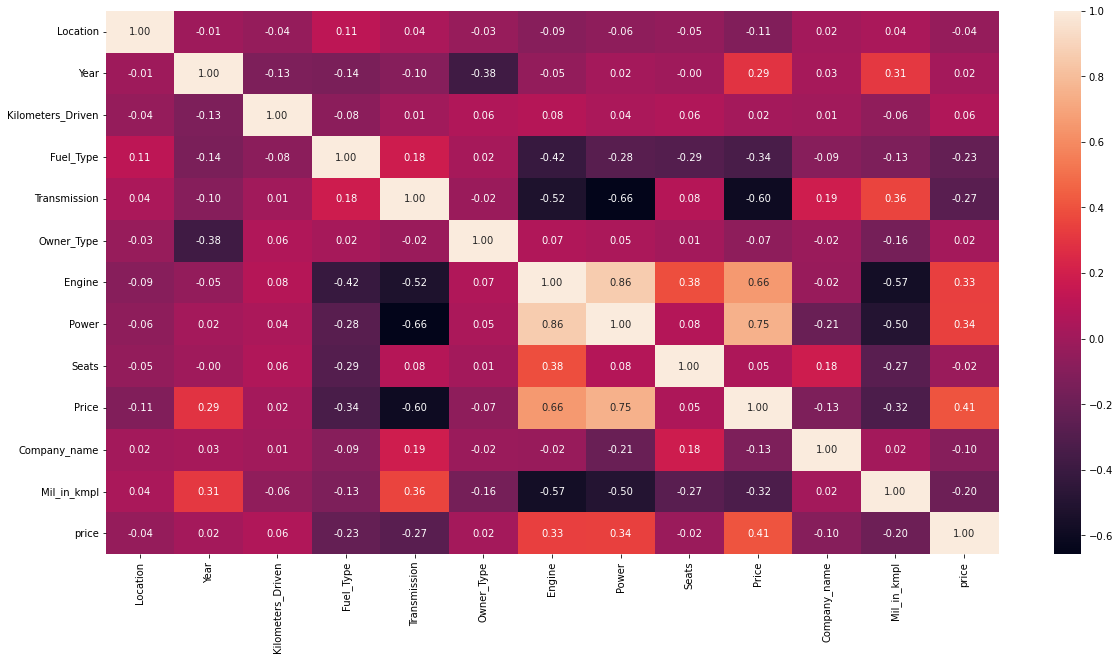

In [72]:
plt.figure(figsize=(20,10))
snb.heatmap(data.corr(),annot=True,fmt='.2f')

In [77]:
grp_p1=data.groupby(['Company_name'])['Price'].mean()
grp_p1_dic=grp_p1.to_dict()
grp_p1_dic

{0: 25.537711864406777,
 1: 24.253007712082262,
 2: 59.0,
 3: 3.0594736842105266,
 4: 5.579564459930314,
 5: 5.343432700993677,
 6: 37.63225,
 7: 39.2595,
 8: 7.515317220543807,
 9: 4.245675675675676,
 10: 27.344233128834354,
 11: 26.768163265306125,
 12: 42.8453125,
 13: 5.79903448275862,
 14: 7.559075144508671,
 15: 3.7478000000000002,
 16: 11.577170731707318,
 17: 5.307269841269841,
 18: 18.802857142857142}

In [80]:
data['p1']=data.apply(lambda row:grp_p1_dic[row['Company_name']],axis=1)

In [93]:
with open('p1.json','w') as f:
    json.dump(grp_p1_dic,f)

<AxesSubplot:>

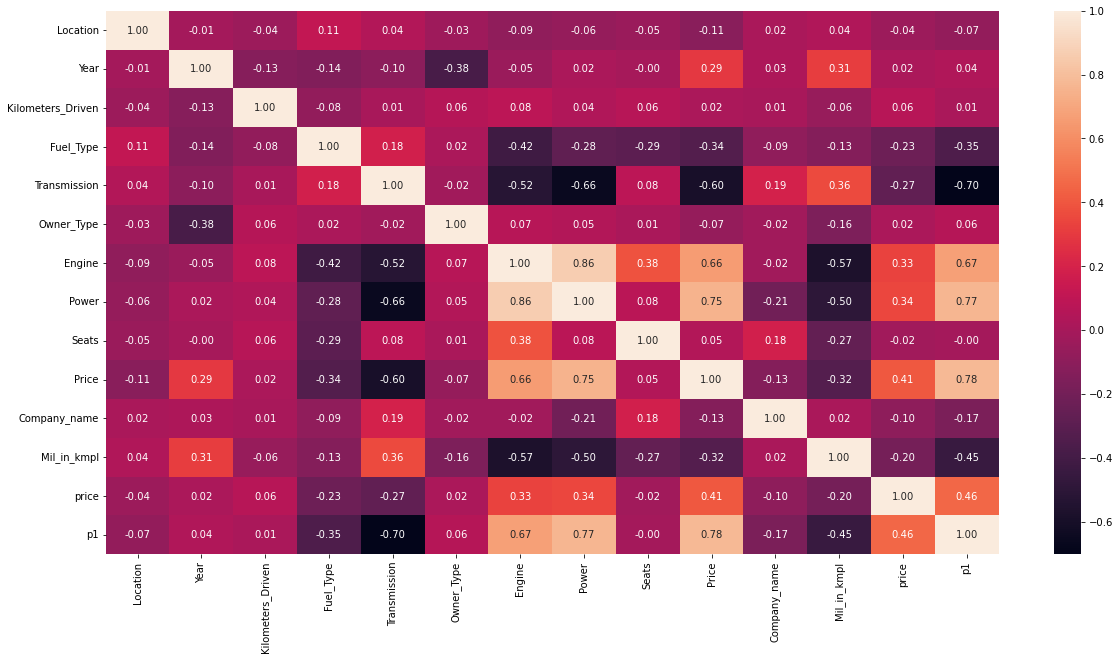

In [81]:
plt.figure(figsize=(20,10))
snb.heatmap(data.corr(),annot=True,fmt='.2f')

In [82]:
X=data.drop(columns=(['Price','Seats','Owner_Type']),axis=1)
y=data['Price']

In [83]:
X.dtypes

Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Engine               float64
Power                float64
Company_name           int32
Mil_in_kmpl          float64
price                float64
p1                   float64
dtype: object

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4998, 11) (2143, 11) (4998,) (2143,)


In [85]:
import lightgbm as lgb
light_Gb=lgb.LGBMRegressor(learning_rate=0.05,max_bin=100,max_depth=5,num_leaves=32,n_estimators=100)
light_Gb.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.05, max_bin=100, max_depth=5, num_leaves=32)

In [86]:
light_pred = light_Gb.predict(X_test)

light_mse = mean_squared_error(y_test, light_pred)
light_rmse = mean_squared_error(y_test, light_pred, squared=False)
light_mae = mean_absolute_error(y_test, light_pred)
light_r2 = r2_score(y_test,light_pred)
light_train = light_Gb.score(X_train,y_train)

In [87]:
print("Light GBM: ")
print("MSE:",light_mse)
print("RMSE:",light_rmse)
print("MAE:",light_mae)
print("test_r2:",light_r2)
print("train r2: ",light_train)

Light GBM: 
MSE: 17.571510654903605
RMSE: 4.191838576913907
MAE: 1.618377361310987
test_r2: 0.9066646793731808
train r2:  0.9558527778845644


In [78]:
from sklearn.tree import DecisionTreeRegressor
dcn_Tree = DecisionTreeRegressor()
dcn_Tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [79]:
dcn_tree_pred = dcn_Tree.predict(X_test)

dcn_mse = mean_squared_error(y_test, dcn_tree_pred)
dcn_rmse = mean_squared_error(y_test, dcn_tree_pred, squared=False)
dcn_mae = mean_absolute_error(y_test, dcn_tree_pred)
dcn_r2 = r2_score(y_test,dcn_tree_pred)
dcn_train = dcn_Tree.score(X_train,y_train)

In [80]:
print("Dicision Tree: ")
print("MSE:",dcn_mse)
print("RMSE:",dcn_rmse)
print("MAE:",dcn_mae)
print("test_r2:",dcn_r2)
print("train_r2: ",dcn_train)

Dicision Tree: 
MSE: 28.34302168299891
RMSE: 5.3238164584251875
MAE: 1.6079421371908538
test_r2: 0.8494491982920461
train_r2:  0.9999789327347626


In [81]:
from sklearn.ensemble import RandomForestRegressor
model_rndFrst=RandomForestRegressor(n_estimators=100,random_state=42)
model_rndFrst.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [82]:
rnd_pred = model_rndFrst.predict(X_test)

rnd_mse = mean_squared_error(y_test, rnd_pred)
rnd_rmse = mean_squared_error(y_test, rnd_pred, squared=False)
rnd_mae = mean_absolute_error(y_test, rnd_pred)
rnd_r2 = r2_score(y_test,rnd_pred)
rnd_train = model_rndFrst.score(X_train,y_train)

In [83]:
print("Random Forest: ")
print("MSE:",rnd_mse)
print("RMSE:",rnd_rmse)
print("MAE:",rnd_mae)
print("test_r2:",rnd_r2)
print("train r2: ",rnd_train)

Random Forest: 
MSE: 14.327707785975253
RMSE: 3.7851958715468417
MAE: 1.406696604448592
test_r2: 0.9238949213693142
train r2:  0.9914194721750368


In [88]:
from xgboost import XGBRegressor
model_xg = XGBRegressor(n_estimators=100,learning_rate=0.1)
model_xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [89]:
xg_pred = model_xg.predict(X_test)

xg_mse = mean_squared_error(y_test, xg_pred)
xg_rmse = mean_squared_error(y_test, xg_pred, squared=False)
xg_mae = mean_absolute_error(y_test, xg_pred)
xg_r2 = r2_score(y_test,xg_pred)
xg_train = model_xg.score(X_train,y_train)

In [90]:
print("XGBOOST: ")
print("MSE:",xg_mse)
print("RMSE:",xg_rmse)
print("MAE:",xg_mae)
print("test_r2:",xg_r2)
print("train r2: ",xg_train)

XGBOOST: 
MSE: 8.989502459955734
RMSE: 2.9982498995173392
MAE: 1.2152397414217249
test_r2: 0.9522500876074989
train r2:  0.9932546908221218


In [87]:
X_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine,Power,Company_name,Mil_in_kmpl,price
5653,7,2014,68365,0,1,998.00,58.16,9,33.25,7.38
6625,10,2007,143000,3,1,1341.00,82.90,5,14.20,12.43
1231,7,2018,31427,1,0,1999.00,177.00,7,15.68,68.34
3972,9,2015,39822,3,1,1598.00,103.52,14,15.41,35.04
580,3,2016,82756,1,1,2523.00,62.10,8,15.96,233.00


In [88]:
cust={
    "Location":[10],
    "Year":[2016],
    "Kilometers_Driven":[39822],
    "Fuel_Type":[1],
    "Transmission":[1],
    "Engine":[1341.00],
    "Power":[177.00],
    "Company_name":[9],
    "Mil_in_kmpl":[16.0],
    "price":[12.76]
}

In [89]:
cust_df=pd.DataFrame(cust)
cust_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Engine,Power,Company_name,Mil_in_kmpl,price
0,10,2016,39822,1,1,1341.00,177.00,9,16.00,12.76


In [90]:
cust_pred=model_xg.predict(cust_df)

In [91]:
cust_pred

array([22.266277], dtype=float32)

In [92]:
cust_pred1=light_Gb.predict(cust_df)

In [93]:
cust_pred1

array([19.3840676])

In [95]:
filename = 'final_model.sav'  # Specify the file name with .sav extension
with open(filename, 'wb') as f:
    pickle.dump(light_Gb, f)

In [91]:
with open('final_model1.sav','wb') as f:
    pickle.dump(light_Gb,f)